In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('D:\\machine learning practice\\customer segmentation\\customer_segmentation_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_data=pd.read_csv('D:\\machine learning practice\\customer segmentation\\customer_segmentation_data.csv')
customer_data.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


Distribution of Age, Income, and Spending Score:

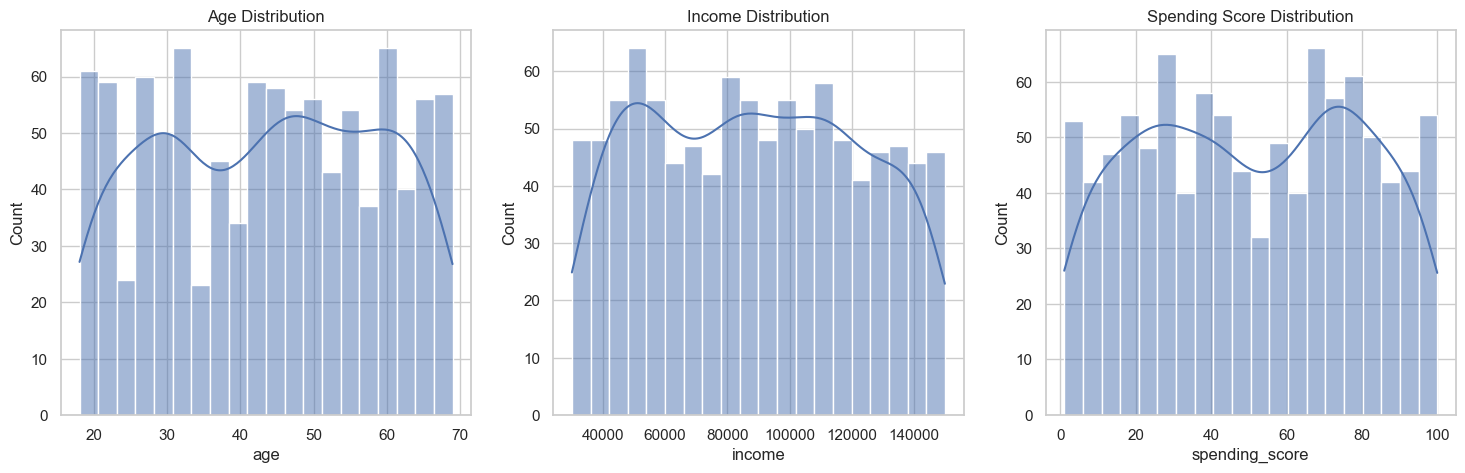

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of Age, Income, and Spending Score
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(customer_data['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(customer_data['income'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Income Distribution')

sns.histplot(customer_data['spending_score'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Spending Score Distribution')

plt.show()

Gender Distribution:

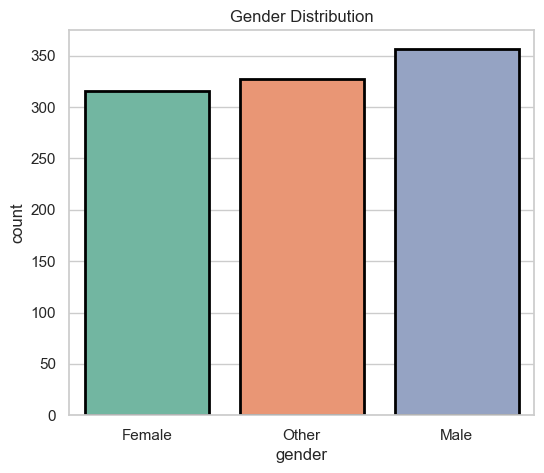

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'customer_data' is your DataFrame and it has been imported correctly

plt.figure(figsize=(6, 5))
sns.countplot(x='gender', data=customer_data, edgecolor='black', linewidth=2, saturation=0.75, palette='Set2', ax=plt.gca())
plt.title('Gender Distribution')
plt.show()

Relationship between Income and Spending Score:¶


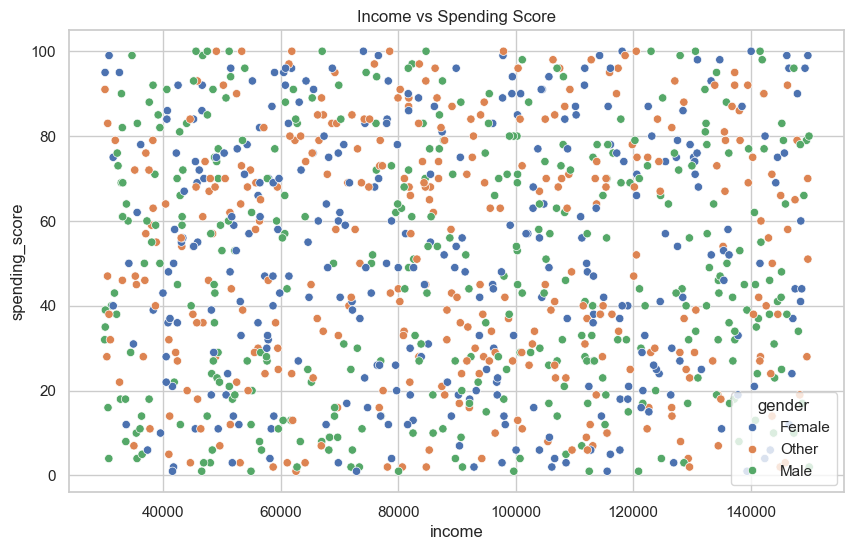

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='spending_score', hue='gender', data=customer_data)
plt.title('Income vs Spending Score')
plt.show()

Purchase Frequency Distribution:

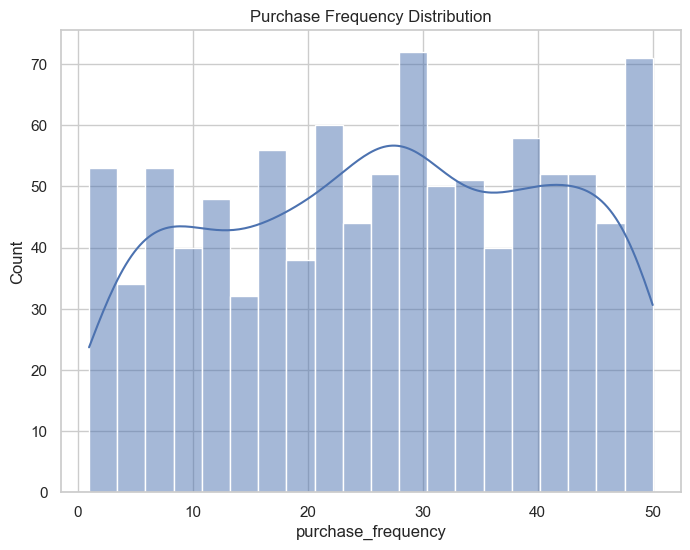

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['purchase_frequency'], bins=20, kde=True)
plt.title('Purchase Frequency Distribution')
plt.show()

Preferred Category Distribution:

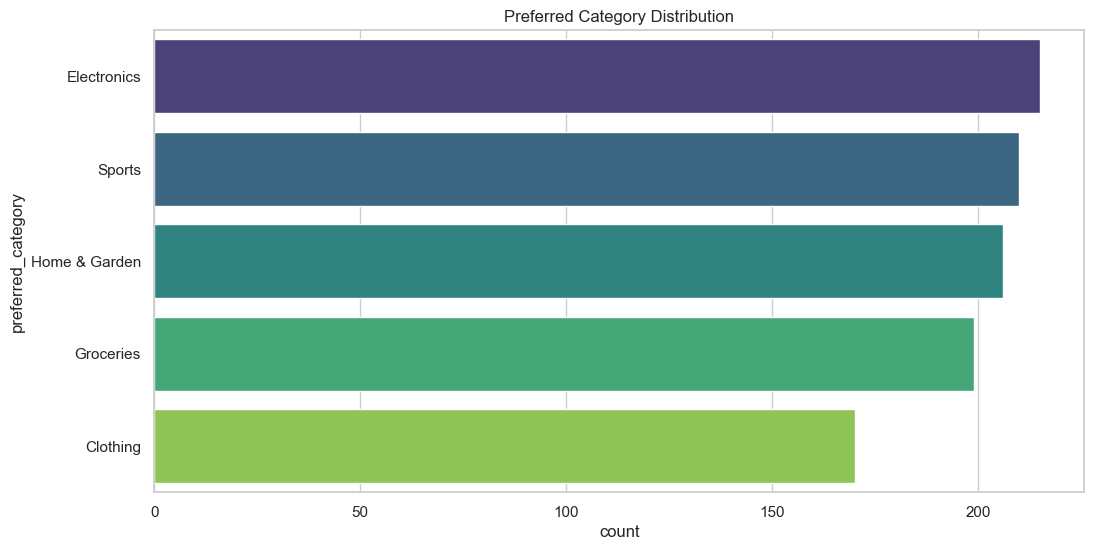

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(y='preferred_category', data=customer_data, order=customer_data['preferred_category'].value_counts().index, palette='viridis')
plt.title('Preferred Category Distribution')
plt.show()

Feature Engineering¶

Age Group: Create age groups (e.g., <20, 20-40, 40-60, >60).

Income Group: Create income groups (e.g., <50k, 50k-100k,100k-150k,>150k).

Spending Score Group: Create spending score groups (e.g., low, medium, high).

Customer Loyalty: Based on membership_years and purchase_frequency.

In [14]:
# 1. Age Group
bins_age = [0, 20, 40, 60, 100]
labels_age = ['<20', '20-40', '40-60', '>60']
customer_data['age_group'] = pd.cut(customer_data['age'], bins=bins_age, labels=labels_age)

# 2. Income Group
bins_income = [0, 50000, 100000, 150000, 200000]
labels_income = ['<50k', '50k-100k', '100k-150k', '>150k']
customer_data['income_group'] = pd.cut(customer_data['income'], bins=bins_income, labels=labels_income)

# 3. Spending Score Group
bins_spending = [0, 33, 66, 100]
labels_spending = ['Low', 'Medium', 'High']
customer_data['spending_score_group'] = pd.cut(customer_data['spending_score'], bins=bins_spending, labels=labels_spending)

# 4. Customer Loyalty
# Assuming that higher purchase frequency and longer membership indicate higher loyalty
customer_data['customer_loyalty'] = customer_data['membership_years'] * customer_data['purchase_frequency']

customer_data.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,age_group,income_group,spending_score_group,customer_loyalty
0,1,38,Female,99342,90,3,24,Groceries,113.53,20-40,50k-100k,High,72
1,2,21,Female,78852,60,2,42,Sports,41.93,20-40,50k-100k,Medium,84
2,3,60,Female,126573,30,2,28,Clothing,424.36,40-60,100k-150k,Low,56
3,4,40,Other,47099,74,9,5,Home & Garden,991.93,20-40,<50k,High,45
4,5,65,Female,140621,21,3,25,Electronics,347.08,>60,100k-150k,Low,75


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Encode categorical features
label_encoder = LabelEncoder()
customer_data['age_group_encoded'] = label_encoder.fit_transform(customer_data['age_group'])
customer_data['income_group_encoded'] = label_encoder.fit_transform(customer_data['income_group'])
customer_data['spending_score_group_encoded'] = label_encoder.fit_transform(customer_data['spending_score_group'])

# Selecting features for clustering
features = ['age_group_encoded', 'income_group_encoded', 'spending_score_group_encoded', 'customer_loyalty']
X = customer_data[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(X_scaled)

# Exclude non-numeric columns for the mean calculation
numeric_columns = customer_data.select_dtypes(include=['number']).columns

# Group by cluster and calculate the mean for numeric columns
cluster_analysis_corrected = customer_data.groupby('cluster')[numeric_columns].mean()

print(cluster_analysis_corrected)

                 id        age         income  spending_score  \
cluster                                                         
0        504.513800  39.456476   90324.687898       47.303609   
1        475.765101  52.872483   69399.543624       42.000000   
2        495.925676  53.506757  113480.547297       69.121622   
3        511.155172  40.525862   81130.254310       51.366379   

         membership_years  purchase_frequency  last_purchase_amount  \
cluster                                                               
0                4.371550           21.942675            482.311104   
1                5.261745           25.610738            526.258926   
2                5.033784           23.554054            485.523041   
3                8.107759           38.616379            495.302371   

         customer_loyalty  age_group_encoded  income_group_encoded  \
cluster                                                              
0               82.384289           0.4522

Cluster 0:

Average age: 40.00

Average income: 91,282

Average spending score: 33.84

Average membership years: 4.54

Average purchase frequency: 22.58

Average last purchase amount: 494.44

Average customer loyalty: 90.33

Cluster 1:

Average age: 40.18

Average income: 87,750

Average spending score: 82.33

Average membership years: 4.89

Average purchase frequency: 23.01

Average last purchase amount: 473.35

Average customer loyalty: 104.95

Cluster 2:
Average age: 58.22

Average income: 87,237

Average spending score: 46.88

Average membership years: 5.08

Average purchase frequency: 25.11

Average last purchase amount: 508.56

Average customer loyalty: 127.85

Cluster 3:

Average age: 40.51

Average income: 85,487

Average spending score: 47.23

Average membership years: 8.35

Average purchase frequency: 40.14

Average last purchase amount: 495.20

Average customer loyalty: 332.28